In [212]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute      import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline    import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [229]:
# Read the sensor feature file (590 columns, no header)
df_features = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom.data", 
                          delim_whitespace=True,  # or sep=' '
                          header=None)

# Read the labels file (two columns: label and timestamp)
df_labels = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom_labels.data", 
                        delim_whitespace=True,  
                        header=None)

/var/folders/cq/0fxss7jx4pdb14ytj0zbbywh0000gp/T/ipykernel_48390/3204940816.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_features = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom.data",
/var/folders/cq/0fxss7jx4pdb14ytj0zbbywh0000gp/T/ipykernel_48390/3204940816.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_labels = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom_labels.data",


In [214]:
df_labels.columns = ["label", "date_time"]
df_labels

,label,date_time
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [215]:
df_features.columns = [f"feature_{i + 1}" for i in range(df_features.shape[1])]
df_features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [216]:
data = pd.concat([
    df_labels[['date_time']],  # only the date_time column
    df_features,               # all the feature columns
    df_labels[['label']]       # only the label column
], axis=1)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, date_time to label
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [230]:
data

,date_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,label
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


Scikit-Learn provides a class StratifiedShuffleSplit that helps us in stratified sampling

In [219]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["label"]):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [220]:
# Check class distribution in original vs train vs test
print("Original:", data["label"].value_counts(normalize=True))
print("Train:   ", strat_train_set["label"].value_counts(normalize=True))
print("Test:    ", strat_test_set["label"].value_counts(normalize=True))

Original: label
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64
Train:    label
-1    0.933759
 1    0.066241
Name: proportion, dtype: float64
Test:     label
-1    0.933121
 1    0.066879
Name: proportion, dtype: float64


In [221]:
type(strat_train_set)

pandas.core.frame.DataFrame

In [222]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 1198 to 470
Columns: 592 entries, date_time to label
dtypes: float64(590), int64(1), object(1)
memory usage: 5.7+ MB


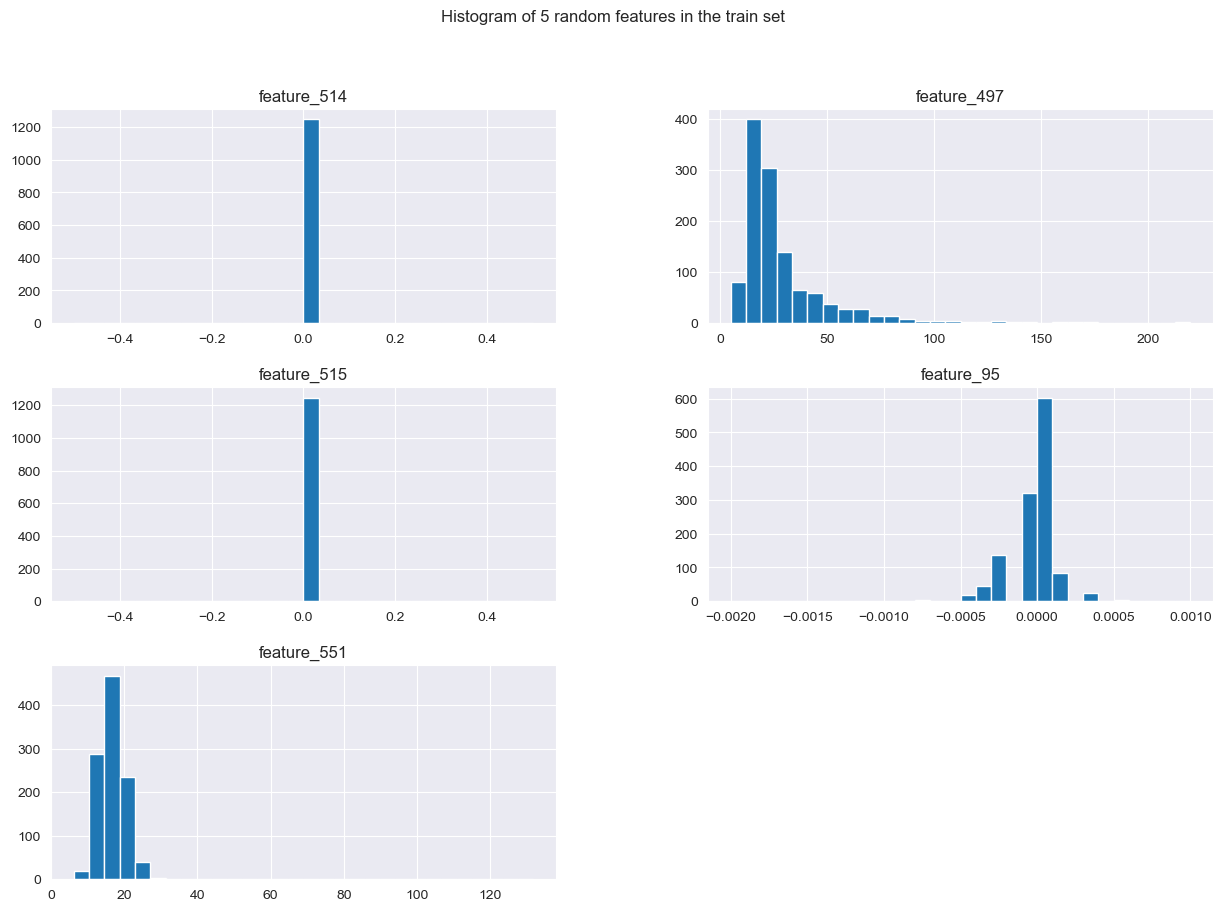

In [223]:
strat_train_set.sample(5, axis=1).hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of 5 random features in the train set')
plt.show()

In [225]:
strat_train_set['label'].value_counts()           # absolute counts

label
-1    1170
 1      83
Name: count, dtype: int64

In [226]:
strat_train_set['label'].value_counts(normalize=True)  # proportions

label
-1    0.933759
 1    0.066241
Name: proportion, dtype: float64

In [227]:
# Find duplicate rows in the dataset (excluding the first occurrence by default)
duplicates = strat_train_set[strat_train_set.duplicated()]
print("Number of duplicated rows:", duplicates.shape[0])

Number of duplicated rows: 0


Univariate outlier checks → Before imputation

In [228]:
# Identify just the numeric features (skip date_time & label)
feature_cols = [c for c in strat_train_set.columns
                if c not in ['date_time', 'label']]

# Work on the numeric slice
df_num = strat_train_set[feature_cols]

# Compute the quartiles & IQR
Q1  = df_num.quantile(0.25)
Q3  = df_num.quantile(0.75)
IQR = Q3 - Q1

#Flag any row where *any* feature is outside [Q1–1.5·IQR, Q3+1.5·IQR]
outliers_iqr = (
    (df_num < (Q1 - 1.5 * IQR)) |
    (df_num > (Q3 + 1.5 * IQR))
).any(axis=1)

# Get the indices (or boolean mask) of the outlier rows
outlier_indices = strat_train_set.index[outliers_iqr]
print(f"Found {len(outlier_indices)} outlier wafers by IQR method.")

Found 1252 outlier wafers by IQR method.


In [203]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imp.fit_transform(df_num), columns=df_num.columns)
# now recompute Q1, Q3, IQR on X_imp

fence_low  = Q1 - 1.5*IQR
fence_high = Q3 + 1.5*IQR

violations = ((X_imp < fence_low) | (X_imp > fence_high))
n_violations = violations.sum(axis=1)

# pick threshold, e.g. at least 10 features out‑of‑bounds
outliers = n_violations >= 5
print(outliers.sum(), "wafers flagged (≥5 extreme sensors)")

1216 wafers flagged (≥5 extreme sensors)


In [204]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=0)
labels = iso.fit_predict(X_imp)
outliers_iso = (labels == -1).sum()
print(outliers_iso, "wafers flagged by IsolationForest")

26 wafers flagged by IsolationForest


Standardization (z‑scoring) is a foundational preprocessing step whenever you have heterogeneous numeric inputs.  By centring each feature at zero and rescaling to unit variance—after your train/test split so you don’t leak information—you ensure that all features contribute comparably to your model’s learning process.

Scaled training shape: (1253, 591)


Why this matters
	•Equalizes feature scales so that algorithms relying on distances (k‑NN, SVM) or gradient magnitudes (neural nets) don’t get dominated by sensors with large numeric ranges.
	•Prevents data leakage: you only compute \mu and \sigma on the training set; when you later call

    ZERO VOLATILITY FEATURES

In [209]:
# Identify columns with one unique value (or potentially no variation)
zero_vol_cols = strat_train_set.columns[strat_train_set.nunique() <= 1]
print("Number of zero volatility columns:", len(zero_vol_cols))
print("Zero volatility columns:", list(zero_vol_cols))

Number of zero volatility columns: 116
Zero volatility columns: ['feature_6', 'feature_14', 'feature_43', 'feature_50', 'feature_53', 'feature_70', 'feature_98', 'feature_142', 'feature_150', 'feature_179', 'feature_180', 'feature_187', 'feature_190', 'feature_191', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_227', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_257', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_277', 'feature_285', 'feature_314', 'feature_315', 'feature_316', 'feature_323', 'feature_326', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_365', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376'

Drop zero volatility columns in train set (592 -116 = 476 features i.e. 474 features excluding date_time & label)

In [168]:
strat_train_set_1 = strat_train_set.drop(columns=zero_vol_cols)

In [169]:
strat_train_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 1198 to 470
Columns: 476 entries, date_time to label
dtypes: float64(474), int64(1), object(1)
memory usage: 4.6+ MB


In [170]:
strat_train_set_1['label'].value_counts(normalize=True)  

label
-1    0.933759
 1    0.066241
Name: proportion, dtype: float64

In [171]:
type(strat_train_set_1)

pandas.core.frame.DataFrame

Low-Volatility Column Analysis

Low-volatility columns vary very little, which might indicate limited usefulness. One way to analyze these is to look at the variance (or standard deviation) of numeric feature columns.

In [172]:
# Suppose  feature columns are all columns except 'date_time' and 'label'
feature_cols = [col for col in strat_train_set_1.columns if col not in ['date_time', 'label']]

# Calculate variance for each feature
variances = strat_train_set_1[feature_cols].var()
print("Variance of features:\n", variances.sort_values())
print(len(variances))

Variance of features:
 feature_96     1.102408e-08
feature_95     2.956563e-08
feature_102    4.630990e-08
feature_545    8.485419e-08
feature_279    1.147983e-07
                   ...     
feature_297    3.934637e+06
feature_25     8.489453e+06
feature_298    1.020563e+07
feature_162    1.829668e+07
feature_163    4.179271e+07
Length: 474, dtype: float64
474


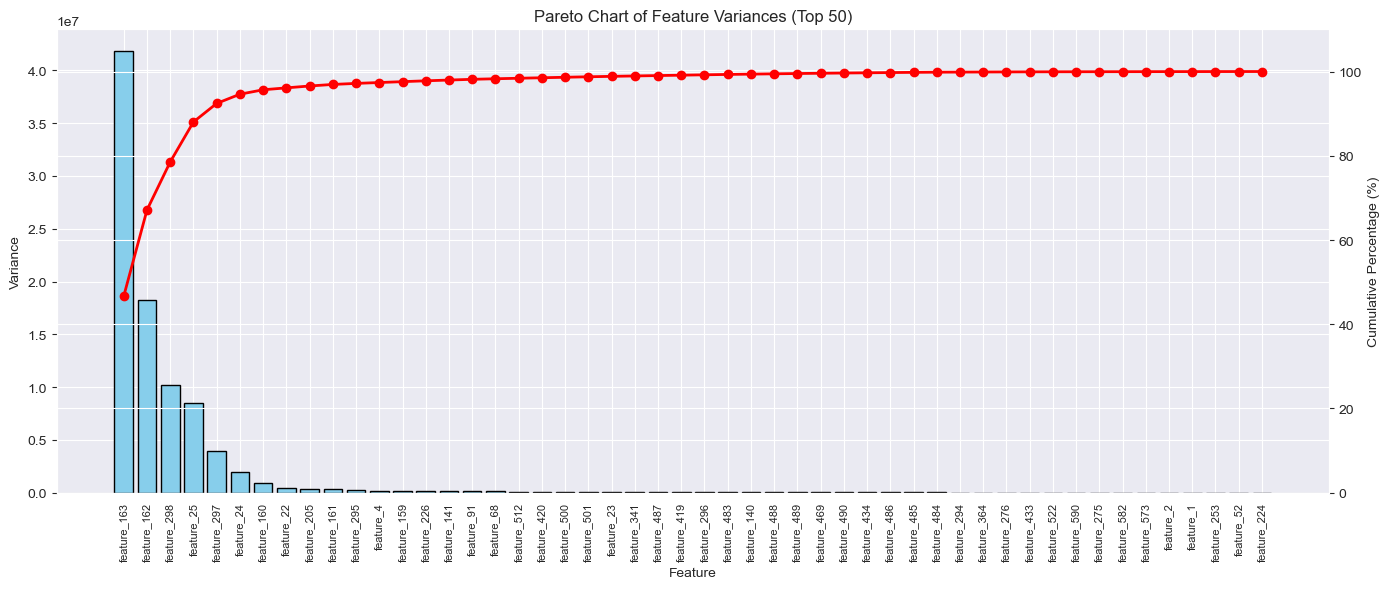

In [173]:
# Sort variances descending
sorted_vars = variances.sort_values(ascending=False)

# (Optional) limit to top 50 for clearer labeling:
top_n = 50
sorted_vars_top = sorted_vars[:top_n]

plt.figure(figsize=(14, 6))  # Wider for more labels on x-axis

# Bar plot: sorted variances
bars = plt.bar(range(len(sorted_vars_top)), sorted_vars_top, align='center', color='skyblue', edgecolor='black')
plt.xticks(range(len(sorted_vars_top)), sorted_vars_top.index, rotation=90, fontsize=8)
plt.title("Pareto Chart of Feature Variances (Top 50)")
plt.xlabel("Feature")
plt.ylabel("Variance")

# Cumulative sum of variances
cum_vars = sorted_vars_top.cumsum()
cum_percent = cum_vars / cum_vars.iloc[-1] * 100

# Overlay cumulative percentage on a secondary axis
ax2 = plt.twinx()
ax2.plot(range(len(sorted_vars_top)), cum_percent, color='red', marker='o', linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 110)
# TODO: Show legend for red line

plt.tight_layout()
plt.show()

In [174]:
# Suppose these are the columns you want to analyze
feature_cols = [col for col in strat_train_set_1.columns if col not in ['date_time', 'label']]

# Compute standard deviation for each feature column
stds = strat_train_set_1[feature_cols].std()

# Sort them in ascending order for analysis
stds_sorted = stds.sort_values()
print("Standard Deviation per feature (ascending):\n", stds_sorted)

Standard Deviation per feature (ascending):
 feature_96        0.000105
feature_95        0.000172
feature_102       0.000215
feature_545       0.000291
feature_279       0.000339
                  ...     
feature_297    1983.591939
feature_25     2913.666613
feature_298    3194.624832
feature_162    4277.461541
feature_163    6464.728110
Length: 474, dtype: float64


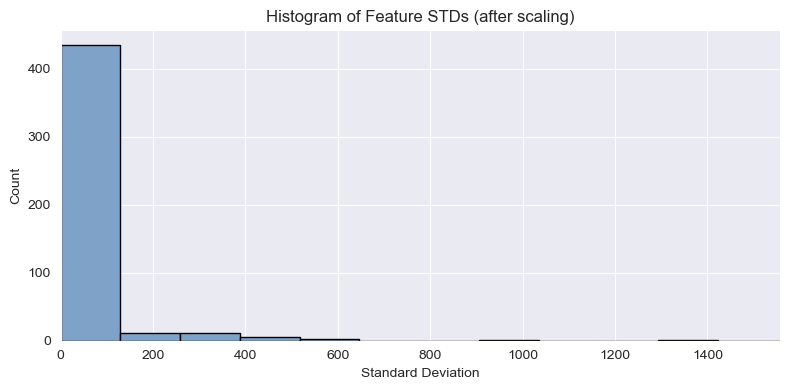

In [175]:
xmax = np.percentile(stds_sorted, 99)          # cap at 99th‑percentile
plt.figure(figsize=(8, 4))
plt.hist(stds_sorted, bins=50,
         color="#7fa2c9", edgecolor="black")
plt.xlabel("Standard Deviation")
plt.ylabel("Count")
plt.title("Histogram of Feature STDs (after scaling)")
plt.xlim(0, xmax)                             # zoom‑in cap
plt.tight_layout()
plt.show()


In [176]:
low_vol_cols = stds_sorted[stds_sorted < 0.01].index
print(f"Columns with std < 0.01 : {len(low_vol_cols)}")

Columns with std < 0.01 : 54


NOT DROPPING LOW VOLITILITY FEATURES YET

Missing values, Nan Analysis

In [177]:
# Count missing values per column
missing_counts = strat_train_set_1.isnull().sum()
print("Missing values per column:\n", missing_counts.sort_values(ascending=False))

Missing values per column:
 feature_158    1136
feature_159    1136
feature_293    1136
feature_294    1136
feature_493    1073
               ... 
feature_306       0
feature_292       0
feature_256       0
feature_255       0
label             0
Length: 476, dtype: int64


In [94]:
def percent_missing(strat_train_set_1):
    percent_nan = 100 * missing_counts / len(strat_train_set_1)
    percent_nan = percent_nan[percent_nan > 55].sort_values()
    
    return percent_nan

In [178]:
percent_nan = percent_missing(strat_train_set_1)
print(percent_nan)

feature_582    61.292897
feature_580    61.292897
feature_579    61.292897
feature_581    61.292897
feature_110    66.320830
feature_111    66.320830
feature_112    66.320830
feature_519    66.320830
feature_245    66.320830
feature_246    66.320830
feature_247    66.320830
feature_518    66.320830
feature_517    66.320830
feature_383    66.320830
feature_384    66.320830
feature_385    66.320830
feature_86     85.634477
feature_359    85.634477
feature_221    85.634477
feature_493    85.634477
feature_293    90.662410
feature_159    90.662410
feature_158    90.662410
feature_294    90.662410
dtype: float64


In [96]:
len(percent_nan)

24

In [179]:
# Sort features by % of missing data (largest at the top)
percent_nan_sorted = percent_nan.sort_values(ascending=False)


/var/folders/cq/0fxss7jx4pdb14ytj0zbbywh0000gp/T/ipykernel_48390/3094506081.py:8: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


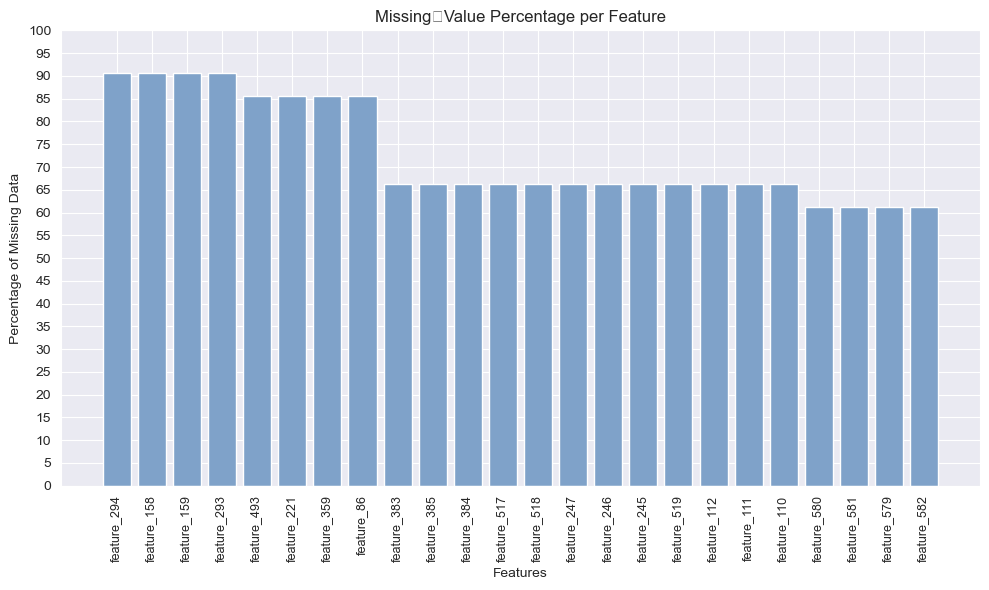

In [180]:
plt.figure(figsize=(10, 6))
plt.bar(percent_nan_sorted.index, percent_nan_sorted.values, color="#7fa2c9")
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Data")
plt.yticks(np.arange(0, 101, 5))            # 5‑point intervals on y‑axis
plt.title("Missing‑Value Percentage per Feature")
plt.tight_layout()
plt.show()

/var/folders/cq/0fxss7jx4pdb14ytj0zbbywh0000gp/T/ipykernel_48390/2168481542.py:22: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/cq/0fxss7jx4pdb14ytj0zbbywh0000gp/T/ipykernel_48390/2168481542.py:22: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


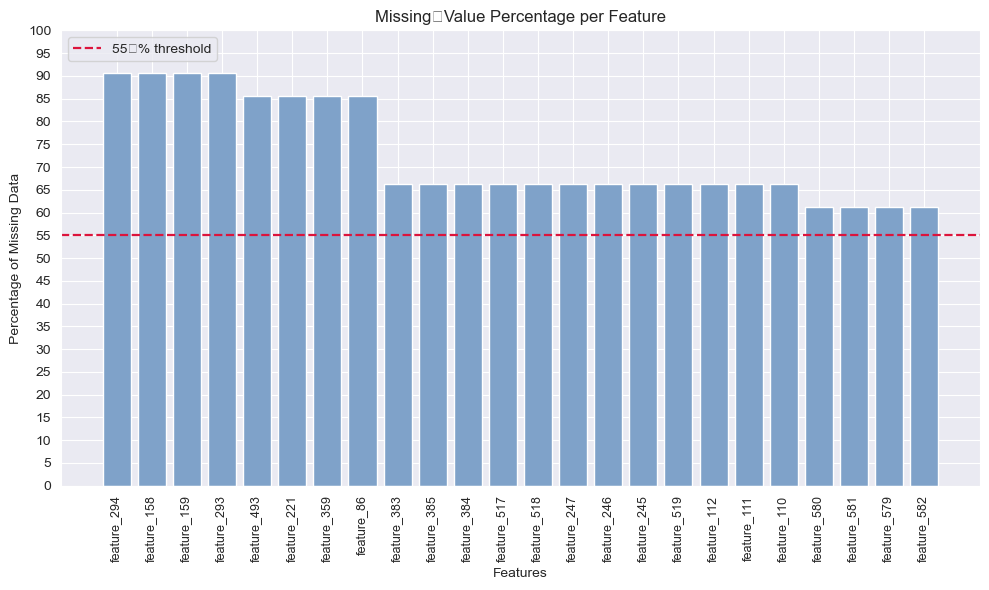

In [181]:
plt.figure(figsize=(10, 6))

# Bars
plt.bar(percent_nan_sorted.index,
        percent_nan_sorted.values,
        color="#7fa2c9")

# Horizontal reference line at 55 %
plt.axhline(y=55,
            linestyle='--',
            color='crimson',
            linewidth=1.6,
            label='55 % threshold')

# Cosmetics
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Data")
plt.yticks(np.arange(0, 101, 5))              # 0–100 in steps of 5
plt.title("Missing‑Value Percentage per Feature")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [182]:
# `percent_nan` already contains the columns exceeding 55 % NA
cols_to_drop = percent_nan.index.tolist()

# Drop them only from the stratified‑train DataFrame
strat_train_set_2 = strat_train_set_1.drop(columns=cols_to_drop)

In [183]:
strat_train_set_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 1198 to 470
Columns: 452 entries, date_time to label
dtypes: float64(450), int64(1), object(1)
memory usage: 4.3+ MB


Columns with numeric 0 as Value

In [184]:
# Percentage of zeros per column
percent_zeros = (strat_train_set_2 == 0).sum() / len(strat_train_set_2) * 100

# Display
print(percent_zeros)

date_time      0.000000
feature_1      0.000000
feature_2      0.000000
feature_3      0.000000
feature_4      0.000000
                 ...   
feature_587    0.000000
feature_588    0.000000
feature_589    0.000000
feature_590    2.234637
label          0.000000
Length: 452, dtype: float64


In [185]:
# Columns you want to inspect
feature_cols = [c for c in strat_train_set_2.columns if c not in ['date_time', 'label']]

# % of zeros per column   ------------------------------------------
# (df == 0) → Boolean df  ➜  .sum() counts Trues  ➜  divide by row count
percent_zeros = (strat_train_set_2[feature_cols] == 0).sum() / len(strat_train_set_2) * 100

# Keep columns with > 98 % zeros, sorted descending
cols_over_98_zero = percent_zeros[percent_zeros > 98].sort_values(ascending=False)

print(cols_over_98_zero)
print(f"number of columns with ≥ 98 % zeros = {len(cols_over_98_zero)}")

feature_75     99.600958
feature_207    99.600958
feature_210    99.600958
feature_343    99.600958
feature_348    99.600958
feature_479    99.600958
feature_522    98.403831
feature_115    98.324022
feature_250    98.324022
feature_388    98.324022
dtype: float64
number of columns with ≥ 98 % zeros = 10


Not Dropping yet

Correlation Analysis

In [186]:
# Considering 1st correlation of features with each other
feature_cols = [c for c in strat_train_set_2.columns if c not in ['date_time', 'label']]
c_matrix = strat_train_set_2[feature_cols].corr() 
c_matrix.shape

(450, 450)

<Axes: >

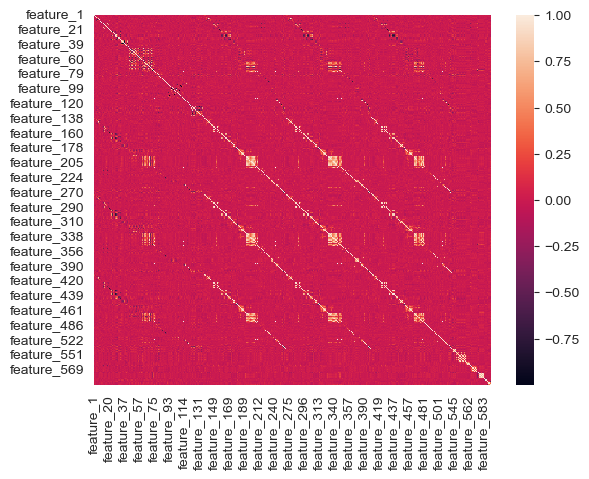

In [126]:
sns.heatmap(c_matrix)

The strength of this linear association is quantified by the Pearson product-moment correlation coefficient. The paper specifies that variables/predictors showing a pairwise correlation of +/-0.8 or higher are removed. It also outlines a specific algorithm to identify and remove the most correlated predictors based on their average correlation with other variables. The result of this analysis is a reduced parameter set containing 28 predictors

In [187]:
# List the feature columns (skip date_time & label)
feature_cols = [c for c in strat_train_set_2.columns
                if c not in ['date_time', 'label']]

# Correlation of every feature with the label
pearson_corr = (
    strat_train_set_2[feature_cols + ['label']]   # keep label in the slice
    .corr(method='pearson')                      
    ['label']                                     # take the target column
    .drop('label')                                # drop self‑correlation (1.0)
    .sort_values(ascending=False)                 # optional: strongest first
)

print(pearson_corr.head(10))   # top 10 positively correlated features
print(pearson_corr.tail(10)) 

feature_104    0.172420
feature_511    0.143697
feature_60     0.125689
feature_349    0.110775
feature_130    0.108355
feature_432    0.105504
feature_65     0.103892
feature_22     0.099356
feature_431    0.092797
feature_435    0.092337
Name: label, dtype: float64
feature_105   -0.067506
feature_71    -0.067809
feature_453   -0.076360
feature_15    -0.079136
feature_181   -0.079750
feature_128   -0.079849
feature_123   -0.085113
feature_29    -0.086053
feature_317   -0.089927
feature_126   -0.094960
Name: label, dtype: float64


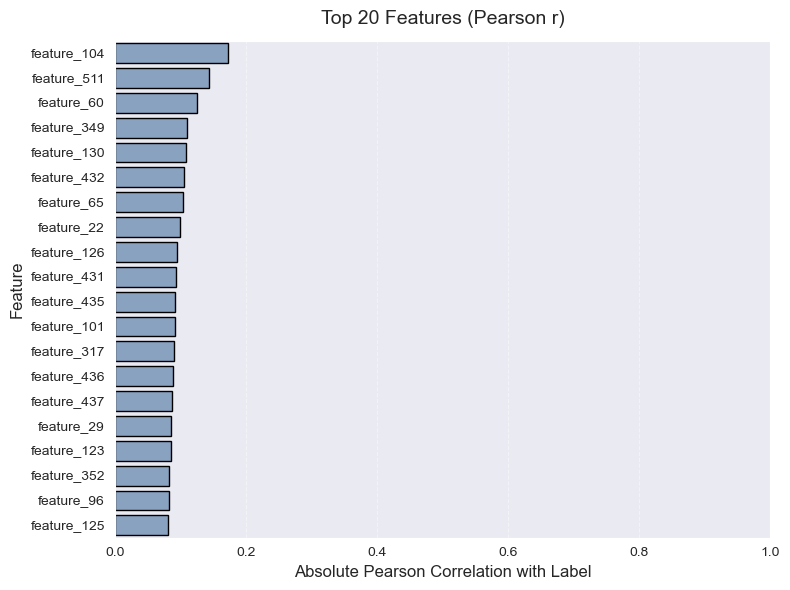

In [188]:
top_n = 20
top_corr = pearson_corr.abs().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values,
            y=top_corr.index,
            color="#7fa2c9",                # muted blue
            edgecolor="black")

plt.xlabel("Absolute Pearson Correlation with Label", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(f"Top {top_n} Features (Pearson r)", fontsize=14, pad=12)
plt.xlim(0, 1)                               # r ranges 0–1 in magnitude
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [189]:
# List the feature columns (skip date_time & label)
feature_cols = [c for c in strat_train_set_2.columns
                if c not in ['date_time', 'label']]

# Correlation of every feature with the label
spearman_corr = (
    strat_train_set_2[feature_cols + ['label']]   # keep label in the slice
    .corr(method='spearman')                      
    ['label']                                     # take the target column
    .drop('label')                                # drop self‑correlation (1.0)
    .sort_values(ascending=False)                 # optional: strongest first
)

print(spearman_corr.head(10))   # top 10 positively correlated features
print(spearman_corr.tail(10)) 

feature_248    0.160706
feature_520    0.159655
feature_104    0.156408
feature_60     0.137805
feature_386    0.132877
feature_511    0.121534
feature_478    0.119787
feature_206    0.117683
feature_34     0.110556
feature_130    0.106273
Name: label, dtype: float64
feature_271   -0.071445
feature_15    -0.074517
feature_128   -0.075438
feature_282   -0.078435
feature_29    -0.078798
feature_453   -0.078904
feature_123   -0.084216
feature_181   -0.084842
feature_126   -0.092826
feature_317   -0.094360
Name: label, dtype: float64


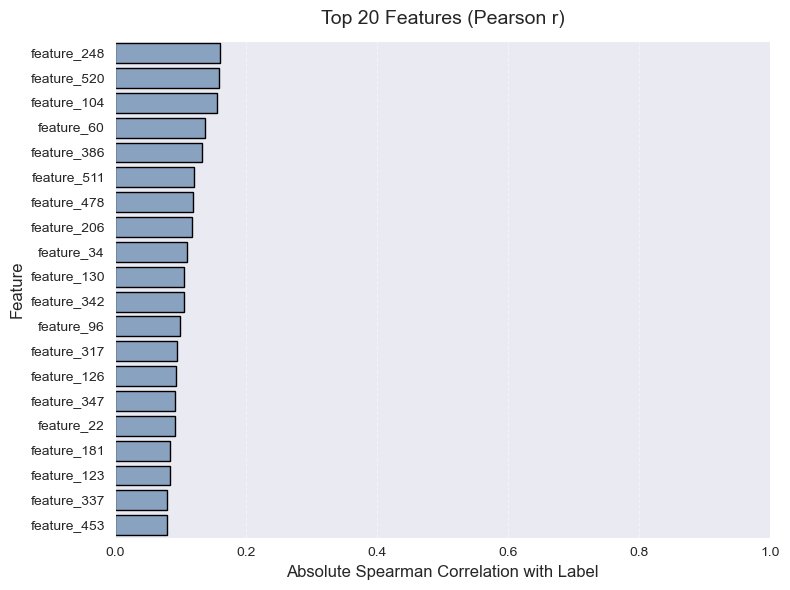

In [191]:
top_n = 20
top_corr = spearman_corr.abs().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values,
            y=top_corr.index,
            color="#7fa2c9",                # muted blue
            edgecolor="black")

plt.xlabel("Absolute Spearman Correlation with Label", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title(f"Top {top_n} Features (Pearson r)", fontsize=14, pad=12)
plt.xlim(0, 1)                               # r ranges 0–1 in magnitude
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [192]:
def select_uncorrelated_features(df, threshold=0.8):
    """
    Iteratively drop the feature with the highest average absolute correlation
    until no pairwise correlation ≥ threshold remains.
    
    Parameters
    ----------
    df : pd.DataFrame
        Numeric feature matrix (columns = features).
    threshold : float
        Maximum allowed absolute Pearson r between any two remaining features.
    
    Returns
    -------
    List[str]
        Names of the features left after de‑correlation.
    """
    # 1) compute initial abs correlation matrix
    corr = df.corr().abs()
    
    # we’ll only look at the upper triangle (k=1) to avoid self‑correlations
    while True:
        # 2) mask lower triangle & diagonal
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        
        # 3) find the largest pairwise correlation
        max_pair = upper.max().max()
        if max_pair < threshold:
            break
        
        # 4) compute each feature’s average corr to the rest
        avg_corr = upper.mean(axis=0)
        
        # 5) drop the feature with the highest average correlation
        feature_to_drop = avg_corr.idxmax()
        corr = corr.drop(index=feature_to_drop, columns=feature_to_drop)
    
    # remaining columns in corr are the de‑correlated set
    return list(corr.columns)



# you’ve already excluded date_time & label:
feature_df = strat_train_set_2.drop(columns=['date_time','label'])

selected_features = select_uncorrelated_features(feature_df, threshold=0.8)
print(f"{len(selected_features)} features remain:", selected_features)

# You can then subset your DF:
df_reduced = strat_train_set_2[selected_features + ['label']]

77 features remain: ['feature_1', 'feature_3', 'feature_5', 'feature_9', 'feature_20', 'feature_21', 'feature_24', 'feature_33', 'feature_41', 'feature_48', 'feature_58', 'feature_68', 'feature_75', 'feature_78', 'feature_83', 'feature_84', 'feature_85', 'feature_87', 'feature_88', 'feature_89', 'feature_90', 'feature_91', 'feature_92', 'feature_95', 'feature_100', 'feature_115', 'feature_117', 'feature_118', 'feature_119', 'feature_120', 'feature_127', 'feature_136', 'feature_144', 'feature_146', 'feature_148', 'feature_151', 'feature_157', 'feature_162', 'feature_167', 'feature_169', 'feature_171', 'feature_183', 'feature_185', 'feature_196', 'feature_212', 'feature_216', 'feature_217', 'feature_219', 'feature_222', 'feature_223', 'feature_226', 'feature_228', 'feature_239', 'feature_254', 'feature_270', 'feature_419', 'feature_420', 'feature_434', 'feature_483', 'feature_485', 'feature_486', 'feature_487', 'feature_490', 'feature_500', 'feature_501', 'feature_512', 'feature_548', 'f

IMPUTATION

 First stage: imputed_train_features  ← median‑filled training features

In [231]:
from sklearn.impute import SimpleImputer

#List the feature columns (skip date_time & label)
feature_cols = [c for c in strat_train_set_2.columns 
                if c not in ['date_time', 'label']]

#Extract that slice from your DataFrame
df1 = strat_train_set_2[feature_cols]

#Fit & apply the median imputer to the numeric array
median_imputer = SimpleImputer(strategy='median')
arr = median_imputer.fit_transform(df1)   # arr is a NumPy array of shape (n_rows, n_features)

#Put it back into a DataFrame, re‑using the original columns & index
imputed_train_features = pd.DataFrame(arr, 
                   columns=df1.columns,
                   index=df1.index)

print("Imputed DF shape:", imputed_train_features.shape)
print(imputed_train_features.head())


Imputed DF shape: (1253, 450)
      feature_1  feature_2  feature_3  feature_4  feature_5  feature_7  \
1198    3075.32    2491.07  2185.1000  1201.0491     0.7821   105.8489   
436     3071.58    2489.47  2217.3777  1425.1041     1.7585   106.2556   
635     3017.53    2524.09  2201.0667   880.2317     1.4148   106.5478   
996     2901.62    2569.45  2223.9000  1745.3724     1.9974    96.7567   
782     2982.59    2466.86  2117.5889   894.0996     1.4330   106.4944   

      feature_8  feature_9  feature_10  feature_11  ...  feature_577  \
1198     0.1208     1.4002     -0.0151     -0.0006  ...       1.0970   
436      0.1200     1.5270      0.0066     -0.0124  ...       1.3400   
635      0.1211     1.3720     -0.0005      0.0052  ...       1.4452   
996      0.1241     1.5950     -0.0163      0.0061  ...       1.6245   
782      0.1253     1.4418     -0.0096      0.0006  ...       1.2250   

      feature_578  feature_583  feature_584  feature_585  feature_586  \
1198      16.9045  

In [232]:
imputed_train_features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_577,feature_578,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1198,3075.32,2491.07,2185.1000,1201.0491,0.7821,105.8489,0.1208,1.4002,-0.0151,-0.0006,...,1.0970,16.9045,0.4974,0.0128,0.0033,2.5767,0.0223,0.0105,0.0034,47.0690
436,3071.58,2489.47,2217.3777,1425.1041,1.7585,106.2556,0.1200,1.5270,0.0066,-0.0124,...,1.3400,11.3021,0.5004,0.0316,0.0066,6.3183,0.0329,0.0055,0.0022,16.6695
635,3017.53,2524.09,2201.0667,880.2317,1.4148,106.5478,0.1211,1.3720,-0.0005,0.0052,...,1.4452,17.2719,0.4998,0.0097,0.0026,1.9495,0.0328,0.0235,0.0068,71.5333
996,2901.62,2569.45,2223.9000,1745.3724,1.9974,96.7567,0.1241,1.5950,-0.0163,0.0061,...,1.6245,13.2830,0.5004,0.0174,0.0034,3.4771,0.0200,0.0205,0.0061,102.5241
782,2982.59,2466.86,2117.5889,894.0996,1.4330,106.4944,0.1253,1.4418,-0.0096,0.0006,...,1.2250,14.3891,0.4986,0.0172,0.0038,3.4561,0.0373,0.0079,0.0030,21.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,3058.89,2504.38,2221.9444,1551.6947,1.5296,99.2678,0.1222,1.4068,0.0057,0.0033,...,1.8868,8.9120,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000
365,2988.92,2460.91,2178.0778,941.9524,0.8039,104.0167,0.1229,1.5829,-0.0278,-0.0324,...,1.2816,10.4728,0.4976,0.0148,0.0032,2.9645,0.0291,0.0135,0.0045,46.4165
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.4111,0.1238,1.4968,-0.0201,-0.0060,...,1.0949,16.9589,0.4994,0.0115,0.0033,2.3077,0.0299,0.0071,0.0020,23.6431
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,102.9356,0.1201,1.4453,-0.0126,0.0152,...,1.8020,7.1763,0.5016,0.0160,0.0035,3.1882,0.0049,0.0144,0.0047,293.2614


Second stage: KNN impute on the median‑filled matrix

In [233]:
knn_imp = KNNImputer(
            n_neighbors=5,         # try 3‑10 in tuning
            weights='distance',    # closer neighbours = more weight
            metric='nan_euclidean' # default, handles NaNs
)
# Fit on TRAIN only, transform TRAIN s
X_train_knn = knn_imp.fit_transform(imputed_train_features)

# Rewrap as DataFrame
X_train_knn = pd.DataFrame(X_train_knn,
                           columns=feature_cols,
                           index=imputed_train_features.index)

print("KNN‑imputed shapes → train:", X_train_knn.shape)


KNN‑imputed shapes → train: (1253, 450)


SCALING

In [234]:
#Standard‑scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)

Fit an initial model - RandomForest

In [235]:
from sklearn.ensemble import RandomForestClassifier
y_train = strat_train_set['label'].values 
rf = RandomForestClassifier(
        n_estimators=300,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1)
rf.fit(X_train_knn, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [239]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, balanced_accuracy_score,
                             make_scorer)
import numpy as np

# 1.  Define the model (your forest)
rf = RandomForestClassifier(
        n_estimators=300,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1)

# 2.  Build a dict of scorers you care about
scorers = {
    'accuracy' : make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),   # adjust pos_label if needed
    'recall'   : make_scorer(recall_score,    pos_label=1),
    'f1'       : make_scorer(f1_score,        pos_label=1),
    'bal_acc'  : make_scorer(balanced_accuracy_score),
}

# 3.  5‑fold stratified CV on *training* data only
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(rf,
                            X_train_knn, y_train,
                            cv=cv,
                            scoring=scorers,
                            n_jobs=-1,
                            return_train_score=False)

# 4.  Print mean ± std for each metric
for metric, values in cv_results.items():
    if metric.startswith('test_'):
        name = metric.replace('test_', '')
        print(f"{name:>5}:  {values.mean():.3f} ± {values.std():.3f}")

/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/an

accuracy:  0.934 ± 0.002
precision:  0.000 ± 0.000
recall:  0.000 ± 0.000
   f1:  0.000 ± 0.000
bal_acc:  0.500 ± 0.000


In [241]:
from sklearn.metrics import confusion_matrix

rf.fit(X_train_knn, y_train)
print(confusion_matrix(y_train, rf.predict(X_train_knn)))

[[1170    0]
 [   0   83]]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# 
# #Imports the StandardScaler class from scikit‑learn.
# 
# #StandardScaler is a transformer that will subtract the mean and divide by the standard deviation feature‑wise, producing features with zero mean and unit variance (i.e. z‑scores).
# 
# # Identify numeric feature columns (skip date_time & label)
# numeric_cols = [c for c in strat_train_set.columns
#                 if strat_train_set[c].dtype in ['int64','float64']]
# scaler = StandardScaler()
# #Instantiates a StandardScaler object called scaler.
# # At this point it knows nothing about the data—it just has the machinery to compute means and variances later.
# 
# # Fit & transform **only** the numeric features
# strat_train_num = strat_train_set[numeric_cols]
# strat_train_scaled = scaler.fit_transform(strat_train_num)
# 
# # keep it as a DataFrame again:
# import pandas as pd
# strat_train_scaled = pd.DataFrame(
#     strat_train_scaled,
#     columns=numeric_cols,
#     index=strat_train_set.index
# )
# 
# print("Scaled training shape:", strat_train_scaled.shape)

BALANCING DATA